# Trade full matrix

### Table name:
Trade: Detailed trade matrix

### Metadata:
The dataset contains all food and agricultural products imported and exported during the reference year by country. In addition to the individual country data, other item and country aggregates are disseminated. The processed trade data is essential for the compilation of Supply/Utilization Accounts (SUA) and Food Balance Sheets (FBS). 

 This source data is checked for outliers, trade partner data is used for non-reporting countries or missing cells, and data on food aid is added to take into account total cross-border trade flows. 
 
 The trade database includes the following variables: export quantity, export value, import quantity, and import value.
 
 https://fenixservices.fao.org/faostat/static/bulkdownloads/Trade_DetailedTradeMatrix_E_All_Data_(Normalized).zip


# EDA

In [1]:
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport

c:\Users\UX433F\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Read a sample of random rows from large file

In [2]:
# Define the sample size
sample_size = 10000

# Get the number of rows in the file (excluding the header)
total_rows = sum(1 for row in open(r"..\data\FAOSTAT\all_raw\Trade_DetailedTradeMatrix_E_All_Data_(Normalized).csv", 'r', encoding="ISO-8859-1")) - 1

# Generate random row indices to skip
skip_indices = np.random.choice(np.arange(1, total_rows + 1), size=total_rows - sample_size, replace=False)

# Read the CSV file with the generated skip indices
trade_mx_sample = pd.read_csv(
    r"..\data\FAOSTAT\all_raw\Trade_DetailedTradeMatrix_E_All_Data_(Normalized).csv",
    encoding="ISO-8859-1",
    skiprows=skip_indices,
    nrows=sample_size
)

In [ ]:
profile = ProfileReport(trade_mx_sample, title = "data")
profile

In [7]:
trade_mx_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000000 entries, 0 to 9999999
Data columns (total 16 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Reporter Country Code        int64  
 1   Reporter Country Code (M49)  object 
 2   Reporter Countries           object 
 3   Partner Country Code         int64  
 4   Partner Country Code (M49)   object 
 5   Partner Countries            object 
 6   Item Code                    int64  
 7   Item Code (CPC)              object 
 8   Item                         object 
 9   Element Code                 int64  
 10  Element                      object 
 11  Year Code                    int64  
 12  Year                         int64  
 13  Unit                         object 
 14  Value                        float64
 15  Flag                         object 
dtypes: float64(1), int64(6), object(9)
memory usage: 1.2+ GB


<Axes: >

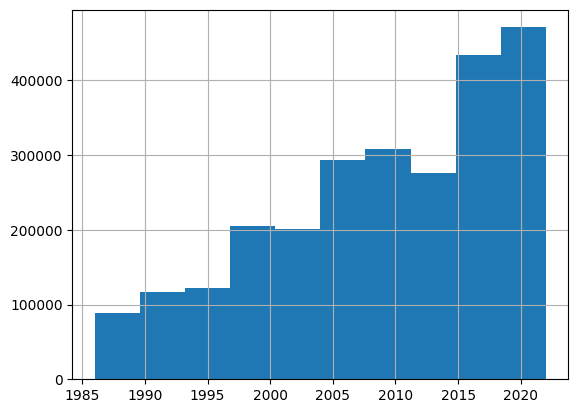

In [14]:
trade_mx_sample['Year'].hist()


In [8]:
trade_mx_sample.head()

,Reporter Country Code,Reporter Country Code (M49),Reporter Countries,Partner Country Code,Partner Country Code (M49),Partner Countries,Item Code,Item Code (CPC),Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
0,2,'004,Afghanistan,4,'012,Algeria,230,'21424,"Cashew nuts, shelled",5910,Export Quantity,2016,2016,t,3.00,X
1,3,'008,Albania,3,'008,Albania,828,'25020.01,Cigarettes,5622,Import Value,2004,2004,1000 USD,104.00,A
2,4,'012,Algeria,2,'004,Afghanistan,231,'21422,"Almonds, shelled",5610,Import Quantity,2005,2005,t,3.00,A
3,3,'008,Albania,3,'008,Albania,831,'25090,Other manufactured tobacco and manufactured to...,5622,Import Value,1999,1999,1000 USD,2.00,A
4,10,'036,Australia,2,'004,Afghanistan,221,'01371,"Almonds, in shell",5610,Import Quantity,2018,2018,t,2.12,A


In [9]:
cols_todrop = ['Reporter Country Code (M49)', 'Partner Country Code (M49)', 'Year Code']
trade_mx_sample.drop(columns=cols_todrop, inplace=True)

## Searching for Asparagus (should be air-freighted)

In [10]:
sparag_rows = trade_mx_sample[trade_mx_sample['Item'].str.contains("sparag")]

In [11]:
sparag_rows.head()

,Reporter Country Code,Reporter Countries,Partner Country Code,Partner Countries,Item Code,Item Code (CPC),Item,Element Code,Element,Year,Unit,Value,Flag
628,12,Bahamas,9,Argentina,367,'01211,Asparagus,5610,Import Quantity,2009,t,0.00,A
842,57,Belarus,3,Albania,367,'01211,Asparagus,5622,Import Value,2014,1000 USD,1.00,A
4470,7,Angola,255,Belgium,367,'01211,Asparagus,5610,Import Quantity,2021,t,0.02,A
6539,10,Australia,9,Argentina,367,'01211,Asparagus,5610,Import Quantity,2013,t,3.00,A
11114,13,Bahrain,10,Australia,367,'01211,Asparagus,5610,Import Quantity,2004,t,0.00,A


## Keeping only: Imports in units of weight or number

In [12]:
trade_mx_sample = trade_mx_sample[trade_mx_sample['Unit'] != '1000 USD']
trade_mx_sample = trade_mx_sample[trade_mx_sample['Element'] == 'Import Quantity']

In [13]:
trade_mx_sample[trade_mx_sample['Unit'] == 'No']['Item'].value_counts()

Item
Bees    603
Name: count, dtype: int64